In [86]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리


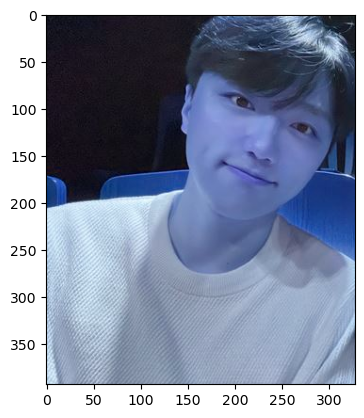

In [87]:
home_dir = os.getenv('HOME')
my_image_path = os.path.join(home_dir, 'work/cat_sticker/images/ts_selfie.JPG') # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

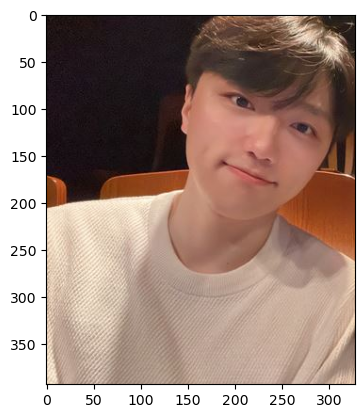

In [88]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [89]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(150, 64) (304, 219)]]


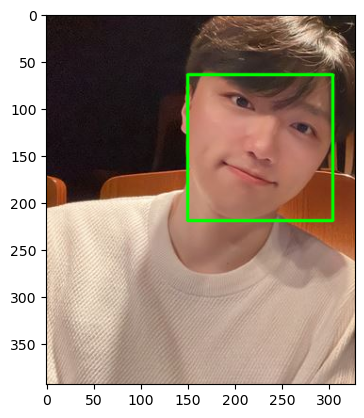

In [90]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [91]:
model_path = os.path.join(home_dir, 'work/cat_sticker/models/shape_predictor_68_face_landmarks.dat')
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [92]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


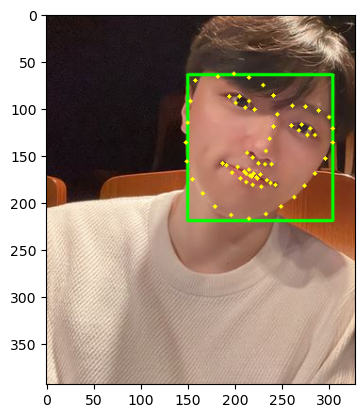

In [93]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [94]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(150, 64) (304, 219)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) # 코 끝의 index는 33 입니다
    x = landmark[33][0] # 이미지에서 코 부위의 x값
    y = landmark[33][1]
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(225, 158)
(x,y) : (225,158)
(w,h) : (155,155)


In [95]:
sticker_path = os.path.join(home_dir, 'work/cat_sticker/images/cat-whiskers.png') # 수염 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(155) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 수염 이미지의 차원 확인

(155, 155, 3)


In [96]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 225
# y는 이미지에서 코 부위의 y값 = 158
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 155
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 155
refined_x = x - w // 2 # 255 - (155//2) = 255-77 = 148
refined_y = y - h //2 # 158 - (155//2) = 158-77 = 81
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 수염 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') 

(x,y) : (148,81)


In [97]:
# 스티커 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 스티커 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (148,81)


In [98]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
img_show_blended = img_show.copy()
img_bgr_blended = img_bgr.copy()

sticker_area = img_show_blended[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# cv2.addWeighted 함수를 활용하여 가중치 값들을 통해 투명도를 조절한다.
blended_img_sticker = cv2.addWeighted(sticker_area, 0.3, img_sticker, 0.7, 0.0)

# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다.
# 아래 코드에서는 img_sticker가 0(검은색)이 아닐 경우(스티커 이미지에서 수염 부분 제외한 나머지 이미지)에는 sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,
# 나머지 부분은 img_sticker(수염 이미지)를 적용한다.
img_show_blended[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,blended_img_sticker).astype(np.uint8)

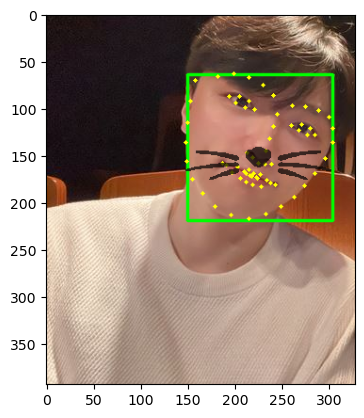

In [99]:
# 수염 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역과 랜드마크를 미리 적용해놓은 img_show_blended에 수염 이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show_blended, cv2.COLOR_BGR2RGB))
plt.show()

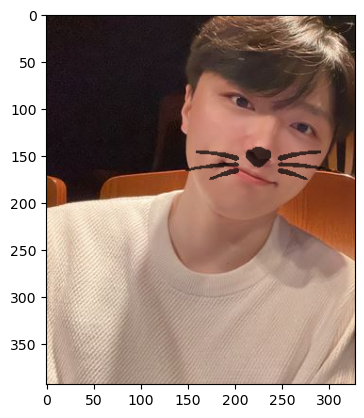

In [100]:
sticker_area = img_bgr_blended[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 rgb로만 적용해놓은 원본 이미지이다.
blended_img_sticker = cv2.addWeighted(sticker_area, 0.3, img_sticker, 0.7, 0.0)
img_bgr_blended[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,blended_img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr_blended, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 수염 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

## 얼굴이 회전되어 있는 경우
- 위에 예시와 같이 얼굴이 정면을 기준으로 회전되었을 시 스티커도 얼굴 각도에 맞춰 회전시켜줘야 합니다.
- 이는 cv2.getRotationMatrix2D와 cv2.warpAffine 함수를 통해 구현할 수 있습니다. 

In [101]:
from math import atan2, degrees

def cal_angle(p1,p2):
    xdif = p2[0] - p1[0]
    ydif = p2[1] - p1[1]
    
    # math 라이브러리에 atan2와 degrees 함수를 통해 기울어진 얼굴의 각도를 걔산
    return degrees(atan2(ydif,xdif))

# 양 콧구멍의 끝 lanmark 좌표를 (31과 35) 기준으로 기울어진 각도를 계산
angle = -cal_angle(list_landmarks[0][31],list_landmarks[0][35])
# 이미지의 중심을 기준으로 회전
matrix = cv2.getRotationMatrix2D((w//2, h//2),angle,1)
# borderValue 매개변수를 통해 회전 시 생기는 빈 공간을 흰색 배경으로 채움
rotated_sticker = cv2.warpAffine(img_sticker, matrix, (0,0), borderMode=cv2.BORDER_CONSTANT, borderValue=(255,255,255))

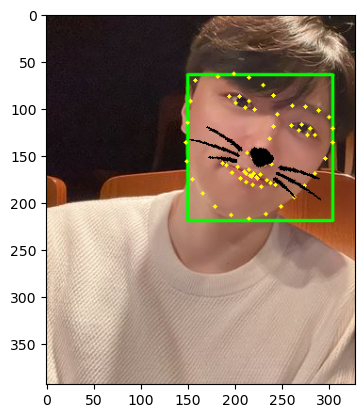

In [102]:
img_show_angle = img_show.copy()
img_bgr_angle = img_bgr.copy()

sticker_area = img_show_angle[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show_angle[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(rotated_sticker!=0,sticker_area,rotated_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show_angle, cv2.COLOR_BGR2RGB))
plt.show()

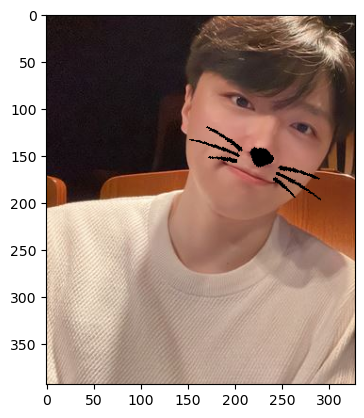

In [103]:
sticker_area = img_bgr_angle[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

blended_img_sticker = cv2.addWeighted(sticker_area, 0.3, img_sticker, 0.7, 0.0)
img_bgr_angle[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(rotated_sticker!=0,sticker_area,rotated_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr_angle, cv2.COLOR_BGR2RGB)) 
plt.show()

## 일정 거리와 투명한 안경 착용 시 face detection

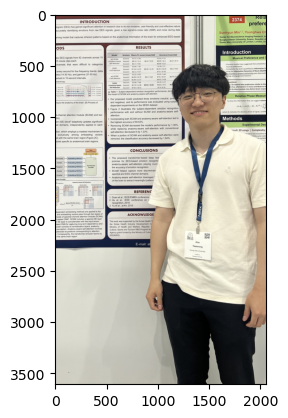

In [104]:
my_image_path_far = os.path.join(home_dir, 'work/cat_sticker/images/ts_selfie_far.jpg') # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr_far = cv2.imread(my_image_path_far)    # OpenCV로 이미지를 불러옵니다
img_show_far = img_bgr_far.copy()      # 출력용 이미지를 따로 보관합니다

img_rgb_far = cv2.cvtColor(img_bgr_far, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_far) 
plt.show() 

In [105]:
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
dlib_rects = detector_hog(img_rgb_far, 1)   # (image, num of image pyramid)

print(dlib_rects)

rectangles[[(1170, 657) (1632, 1119)]]


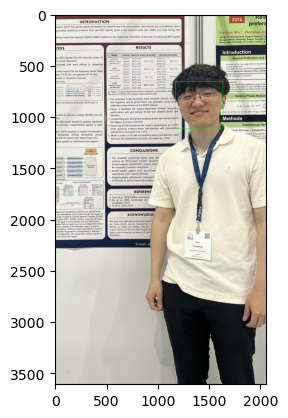

In [106]:
for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show_far, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb_far =  cv2.cvtColor(img_show_far, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb_far)
plt.show()

In [107]:
model_path = os.path.join(home_dir, 'work/cat_sticker/models/shape_predictor_68_face_landmarks.dat')
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb_far, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))


68


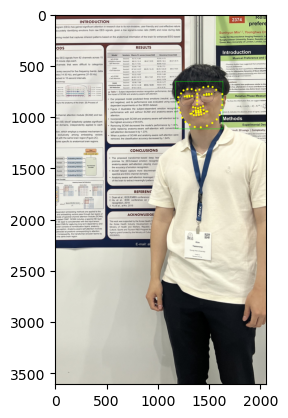

In [108]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show_far, point, 10, (0, 255, 255), -1)

img_show_rgb_far = cv2.cvtColor(img_show_far, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb_far)
plt.show()

In [109]:

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): 
    print (landmark[33]) 
    x = landmark[33][0] 
    y = landmark[33][1]
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(1390, 918)
(x,y) : (1390,918)
(w,h) : (463,463)


In [110]:
sticker_path = os.path.join(home_dir, 'work/cat_sticker/images/cat-whiskers.png') 
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h)) 
print (img_sticker.shape) 

(463, 463, 3)


In [111]:
refined_x = x - w // 2 # 1390 - (463//2) = 1390-231 = 1159
refined_y = y - h //2 # 918 - (463//2) = 918-231= 687
print (f'(x,y) : ({refined_x},{refined_y})') 

(x,y) : (1159,687)


In [112]:

if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (1159,687)


In [113]:
sticker_area = img_show_far[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show_far[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)

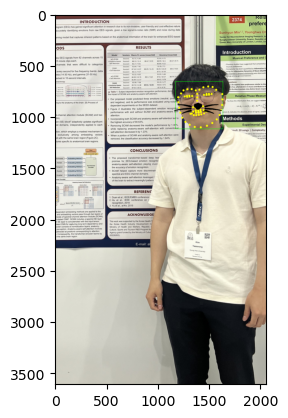

In [114]:
plt.imshow(cv2.cvtColor(img_show_far, cv2.COLOR_BGR2RGB))
plt.show()

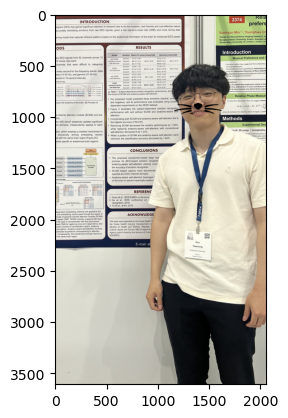

In [115]:
sticker_area = img_bgr_far[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr_far[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr_far, cv2.COLOR_BGR2RGB)) 
plt.show()

--------------------

## dlib HOG 알고리즘 face detection의 한계
- 측면 얼굴 detection 불가
- 선글라스 등 부가적인 얼굴 일부를 가리는 악세서리가 존재할 경우 detection 불가
- 어두운 환경에서 찍힌 얼굴 detection 불가

### 측면 얼굴 face detection

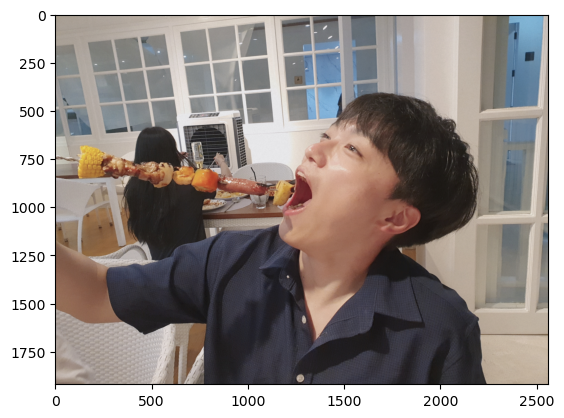

In [116]:
my_image_path_side = os.path.join(home_dir, 'work/cat_sticker/images/ts_selfie_side.jpg') # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr_side = cv2.imread(my_image_path_side)    # OpenCV로 이미지를 불러옵니다
img_show_side = img_bgr_side.copy()      # 출력용 이미지를 따로 보관합니다

img_rgb_side = cv2.cvtColor(img_bgr_side, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_side) 
plt.show() 

In [117]:
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
dlib_rects = detector_hog(img_rgb_side, 1)   # (image, num of image pyramid)

print(dlib_rects)

rectangles[]


### 선글라스 착용시 face detection

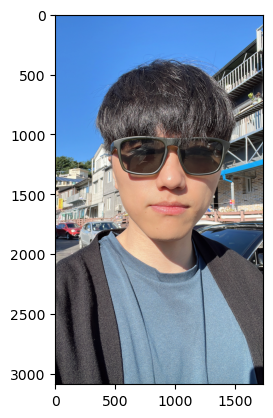

In [118]:
my_image_path_sgl = os.path.join(home_dir, 'work/cat_sticker/images/ts_selfie_sgl.jpg') # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr_sgl = cv2.imread(my_image_path_sgl)    # OpenCV로 이미지를 불러옵니다
img_show_sgl = img_bgr_sgl.copy()      # 출력용 이미지를 따로 보관합니다

img_rgb_sgl = cv2.cvtColor(img_bgr_sgl, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_sgl) 
plt.show() 

In [119]:
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
dlib_rects = detector_hog(img_rgb_sgl, 1)   # (image, num of image pyramid)

print(dlib_rects)

rectangles[]


### 어두운 환경에서 face detection

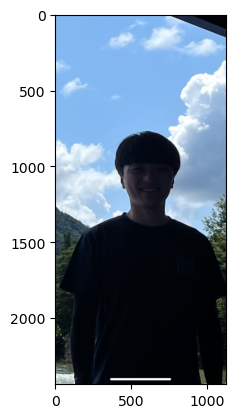

In [120]:
my_image_path_dark = os.path.join(home_dir, 'work/cat_sticker/images/ts_selfie_dark.jpg') # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr_dark = cv2.imread(my_image_path_dark)    # OpenCV로 이미지를 불러옵니다
img_show_dark = img_bgr_dark.copy()      # 출력용 이미지를 따로 보관합니다

img_rgb_dark = cv2.cvtColor(img_bgr_dark, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_dark) 
plt.show() 

In [121]:
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
dlib_rects = detector_hog(img_rgb_dark, 1)   # (image, num of image pyramid)

print(dlib_rects)

rectangles[]


- 위 세 경우 모두 hog detector에서 빈 rectangles을 반환하면서 이미지에서 face를 찾지 못했음을 확인할 수 있다.

---

## 결론
### dlib의 HOC 기반의 face detection 알고리즘  
 
#### 특징:
- 일정 거리까지는 얼굴 detection 가능
- 투명한 안경을 착용하더라도 detection

얼굴 각도에 따른 스티커 변환
- 얼굴의 각도가 기울어지면 서로 대칭되는 face landmark들을 토대로 기울어진 각도를 계산
- cv2.warpAffine과 cv.2getRotationMatrix2D 함수를 통해 스티커 이미지를 기울어진 각도에 맞춰 회전

#### 문제점 및 한계:   

아래 세 가지 경우에서 face detection 실패를 보임
- 측면 얼굴 
- 선글라스와 같은 얼굴을 일부 가리는 악세사리 착용시 얼굴
- 어두운 환경에서의 얼굴

---
### 스티커앱 성능
#### 실행 속도: 
- 스티커앱의 실행 속도는 중요하다고 할 수 있다. 일반적으로 스티커 앱 사용 시 카메라를 통해 실시간으로 얼굴에 스티커가 붙여지는 상황을 살펴보며 맘에 드는 순간에 촬영해 사진을 저장한다. 따라서, 실시간으로 반응하여 스티커가 얼굴 위치와 각도에 따라 적절히 붙을 수 있도록 연산량을 줄이는 등 최적화 하는 과정이 필요하다.

#### 정확도: 
- 스티커앱의 정확도는 사용자의 제약을 최소화할 수 있는 정도로 맞춰야 한다. 이를 테면, 특정 위치, 각도, 장소에서 정확도 성능이 떨어지게 되면 사용자는 스티커앱을 제한된 환경에서 밖에 사용할 수 없다. 따라서, 이러한 불편감을 경험하지 않을 정도의 정확도 성능을 달성하여야 한다. 그러나, 너무 정교하게 할 필요는 없다고 생각한다. 카메라에서 멀리 떨어져 있는 대상은 사용자가 의도하지 않은 대상일 가능성이 높기에, detection 할 필요가 없으며, landmark의 경우 1mm 단위로 세밀하게 맞추기 보다 스티커가 어색하지 않을 정도로만 detection 하는 것이 적절하다고 생각한다.


